# Step 0: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from sklearn.svm import SVC
from sklearn.metrics import f1_score, jaccard_score
from sklearn.preprocessing import StandardScaler

## Function for Find the best kernel, C and gamma

In [2]:
#Function for Find the best kernel, C and gamma
def finder_for_svm(train_x, train_y):
    param_grid = {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [0.1, 1, 10],
        "gamma": ["scale", 1, 0.01, 0.1]
    }
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=1)
    try:
        grid_search.fit(train_x, train_y)
    except Exception as e:
        print(f"Error during model fitting: {e}")
        return None
    ##Showing the result
    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best kernel found: {grid_search.best_params_['kernel']}")

    print("And...")

    best_model = grid_search.best_estimator_
    accuracy = best_model.score(train_x, train_y)
    print(f"Test set accuracy: {accuracy:2f}")
    return best_model

## Function for plotting the Data

In [3]:
##Function for plotting the Data
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis]
        print("Normalize Confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", color="white" if cm[i, j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Prediction label")
    plt.show()

# Step 1: Import Data

In [4]:
try:
    file = pd.read_csv("student-por.csv")
except FileNotFoundError:
    print("File Not Found")

print(file.columns)
file.head(5)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Colmns:
- 1. **school**
- 2. **sex**
- 3. **age**
- 4. **address**
- 5. **famsize**
- 6. **Pstatus**
- 7. **Medu**
- 8. **Fedu**
- 9. **Mjob**
- 10. **Fjob**
- 11. **reason**
- 12. **guardian**
- 13. **traveltime**
- 14. **studytime**
- 15. **failures**
- 16. **schoolsup**
- 17. **famsup**
- 18. **paid**
- 19. **activities**
- 20. **nursery**
- 21. **higher**
- 22. **internet**
- 23. **romantic**
- 24. **famrel**
- 25. **freetime**
- 26. **goout**
- 27. **Dalc**
- 28. **Walc**
- 29. **health**
- 30. **absences**
- 31. **G1**
- 32. **G2**
- 33. **G3**
 
### Important:


- 'sex'
- 'age'
- 'address'
- 'famsize'
- 'Pstatus'
- 'Medu'
- 'Fedu'
- 'Mjob'
- 'Fjob'
- 'guardian'
- 'studytime'
- 'failures'
- 'G1', 'G2'

## Target:
- 'G3'

# Step 2: Clean the Data

In [6]:
n_file = file.drop(columns=['school', 'reason', 'traveltime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'] , axis=1)
n_file.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,2,0,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,father,2,0,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,mother,2,0,12,13,12
3,F,15,U,GT3,T,4,2,health,services,mother,3,0,14,14,14
4,F,16,U,GT3,T,3,3,other,other,father,2,0,11,13,13


In [7]:
n_file['G3'].value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
8      35
9      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

In [8]:
succeeded = []
for g3 in n_file['G3'].values:
    if g3 < 10:
        succeeded.append(0)
    else:
        succeeded.append(1)

# Using 'succeeded' as the column name and equating it to the list
n_file = n_file.assign(succeeded=succeeded)
n_file.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,G1,G2,G3,succeeded
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,2,0,0,11,11,1
1,F,17,U,GT3,T,1,1,at_home,other,father,2,0,9,11,11,1
2,F,15,U,LE3,T,1,1,at_home,other,mother,2,0,12,13,12,1
3,F,15,U,GT3,T,4,2,health,services,mother,3,0,14,14,14,1
4,F,16,U,GT3,T,3,3,other,other,father,2,0,11,13,13,1


In [9]:
n_file['succeeded'].value_counts()

succeeded
1    549
0    100
Name: count, dtype: int64

In [15]:
n_file.dtypes

sex          object
age           int64
address      object
famsize      object
Pstatus      object
Medu          int64
Fedu          int64
Mjob         object
Fjob         object
guardian     object
studytime     int64
failures      int64
G1            int64
G2            int64
G3            int64
succeeded     int64
dtype: object

In [10]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian']:
    n_file[col] = pd.factorize(n_file[col])[0]
    
n_file.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,G1,G2,G3,succeeded
0,0,18,0,0,0,4,4,0,0,0,2,0,0,11,11,1
1,0,17,0,0,1,1,1,0,1,1,2,0,9,11,11,1
2,0,15,0,1,1,1,1,0,1,0,2,0,12,13,12,1
3,0,15,0,0,1,4,2,1,2,0,3,0,14,14,14,1
4,0,16,0,0,1,3,3,2,1,1,2,0,11,13,13,1


In [11]:
n_file.dtypes

sex          int64
age          int64
address      int64
famsize      int64
Pstatus      int64
Medu         int64
Fedu         int64
Mjob         int64
Fjob         int64
guardian     int64
studytime    int64
failures     int64
G1           int64
G2           int64
G3           int64
succeeded    int64
dtype: object

# Step 3: Split the Data into Training/testing

In [12]:
n_file.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'guardian', 'studytime', 'failures', 'G1', 'G2', 'G3',
       'succeeded'],
      dtype='object')

In [13]:
X = np.asanyarray(n_file[['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'guardian', 'studytime', 'failures', 'G1', 'G2']])
y = np.asanyarray(n_file[["succeeded"]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (519, 14) (519, 1)
Test set: (130, 14) (130, 1)


# Step 4: Create a Model and Step 5: Train the Model

In [15]:
model = finder_for_svm(X_train, y_train)
print(model)


## Check if model is successfully created
if model is None:
    print("Model creation failed. Exiting.")
    exit()

/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best kernel found: poly
And...
Test set accuracy: 0.942197
SVC(C=1, kernel='poly')


/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Step 6: Make Predictions

In [16]:
predicted_y = model.predict(X_test)

## Check if predictions are made correctly
if len(predicted_y) != len(y_test):
    print("Mismatch in length between predictions and actual labels.")
    exit()

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.97      0.96      0.96       114

    accuracy                           0.94       130
   macro avg       0.85      0.88      0.86       130
weighted avg       0.94      0.94      0.94       130

Confusion matrix, without normalization
[[ 13   3]
 [  5 109]]


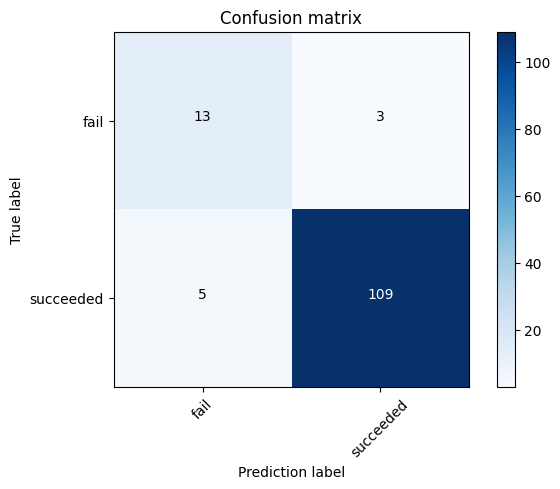

f1_score: 0.9399991991350658
jaccard_score: 0.9316239316239316


In [17]:
##Compute Confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_y, labels=[0, 1])
np.set_printoptions(precision=2)

print(classification_report(y_test, predicted_y))

##plot Confusion matrix(non-normalized)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["fail", "succeeded"], normalize=False, title="Confusion matrix")


print(f"f1_score: {f1_score(y_test, predicted_y, average='weighted')}")
print(f"jaccard_score: {jaccard_score(y_test, predicted_y, pos_label=1)}")

# Step 7: Evaluation and Improve

In [79]:
print(f"f1_score: {f1_score(y_test, predicted_y, average='weighted')}")
print(f"jaccard_score: {jaccard_score(y_test, predicted_y, pos_label=1)}")

f1_score: 0.9399991991350658
jaccard_score: 0.9316239316239316
